# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

Arquivos no diretório '/content': ['.config', 'X_train_selected.csv', '__MACOSX', 'X_test_selected.csv', 'UCI HAR Dataset', 'UCI HAR Dataset.zip', 'sample_data']
Bases carregadas e salvas com sucesso!
Matriz de Confusão:


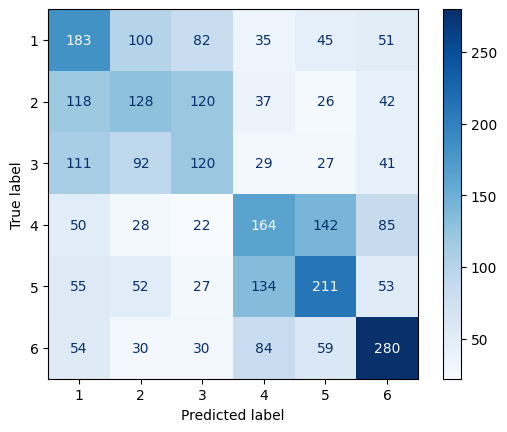


Previsões (y_pred):
[2 5 5 ... 1 2 2]

Valores Reais (y_test):
[5 5 5 ... 2 2 2]

Comparação final (primeiras 10 previsões):
   Real  Previsto
0     5         2
1     5         5
2     5         5
3     5         5
4     5         5
5     5         4
6     5         5
7     5         5
8     5         2
9     5         4


In [6]:
# 1. Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# 2. Definindo o caminho do arquivo ZIP
zip_path = '/content/UCI HAR Dataset.zip'

# 3. Extraindo o conteúdo do ZIP para o diretório /content
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# 4. Verificando se a pasta foi extraída corretamente
print("Arquivos no diretório '/content':", os.listdir('/content'))

# 5. Definindo o caminho base para os arquivos extraídos
path = '/content/UCI HAR Dataset/'

# 6. Carregando as features (nomes das colunas)
features = pd.read_csv(path + 'features.txt', sep='\s+', header=None, names=['index', 'feature'])

# Corrigindo nomes duplicados nas features
features['feature'] = features.groupby('feature').cumcount().astype(str) + '_' + features['feature']
feature_names = features['feature'].tolist()

# 7. Carregando os identificadores dos indivíduos
subject_train = pd.read_csv(path + 'train/subject_train.txt', header=None, names=['subject'])
subject_test = pd.read_csv(path + 'test/subject_test.txt', header=None, names=['subject'])

# 8. Carregando as variáveis explicativas (X_train e X_test)
X_train = pd.read_csv(path + 'train/X_train.txt', sep='\s+', header=None, names=feature_names)
X_test = pd.read_csv(path + 'test/X_test.txt', sep='\s+', header=None, names=feature_names)

# 9. Carregando as atividades (y_train e y_test)
y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['activity'])

# 10. Adicionando o identificador do indivíduo
X_train['subject'] = subject_train
X_test['subject'] = subject_test

# 11. Definindo o índice duplo (ordem + identificador do sujeito)
X_train.set_index([X_train.index, 'subject'], inplace=True)
X_test.set_index([X_test.index, 'subject'], inplace=True)

# 12. Selecionando três colunas específicas para o exercício
selected_features = ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 13. Salvando as bases selecionadas em CSV
X_train_selected.to_csv('/content/X_train_selected.csv', index=True)
X_test_selected.to_csv('/content/X_test_selected.csv', index=True)

print("Bases carregadas e salvas com sucesso!")

# 14. Treinando o modelo com DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)

# 15. Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test_selected)

# 16. Exibindo a matriz de confusão
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

# 17. Exibindo os valores finais
print("\nPrevisões (y_pred):")
print(y_pred)

print("\nValores Reais (y_test):")
print(y_test.values.flatten())  # Flatten para exibir como vetor

print("\nComparação final (primeiras 10 previsões):")
print(pd.DataFrame({'Real': y_test.values.flatten(), 'Previsto': y_pred}).head(10))



### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

Valores de ccp_alpha: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 5.84401136e-05 6.17808017e-05 6.59866112e-05 6.73768888e-05
 7.02851049e-05 7.74168145e-05 7.99585551e-05 8.01474017e-05
 8.28222484e-05 8.29342439e-05 8.49667199e-05 9.21474511e-05
 9.63598696e-05 1.02953015e-04 1.04280015e-04 1.05722623e-04
 1.06211126e-04 1.10109332e-04 1.20580361e-04 1.24186720e-04
 1.32053657e-04 1.35233977e-04 1.36017410e-04 1.41963138e-04
 1.46351627e-04 1.47352194e-04 1.49244166e-04 1.49492770e-04
 1.50482754e-04 1.51968146e-04 1.55713461e-04 1.60511546e-04
 1.60628990e-04 1.64239147e-04 1.67323005e-04 1.74342668e-04
 1.74907961e-04 1.75578030e-04 1.78985873e-04 1.81439304e-04
 1.85996704e-04 1.87333070e-04 1.89065980e-04 1.89796602e-04
 1.96759215e-04 2.01481091e-04 2.01919050e-04 2.02866775e-04
 2.03119333e-04 2.03378413e-04 2.03817707e-04 2.04208078e-04
 2.05459167e-04 2.05888258e-04 2.06087949e-04 2.07617553e-04
 2

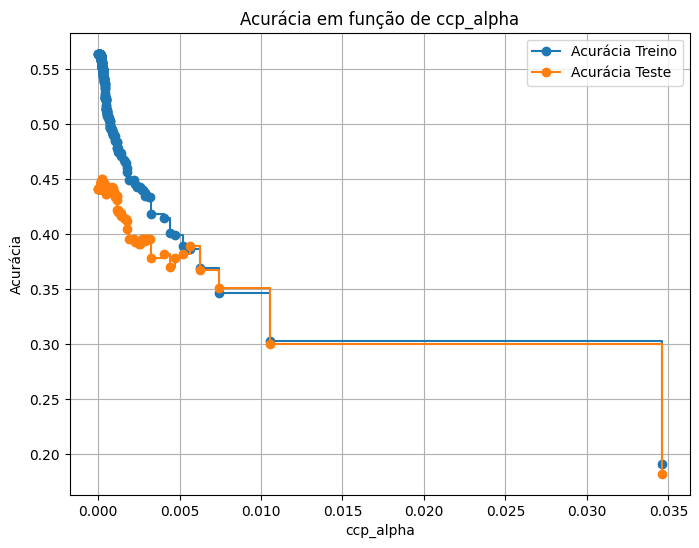

Melhor valor de ccp_alpha: 0.000261784704614439

Matriz de Confusão (árvore podada):


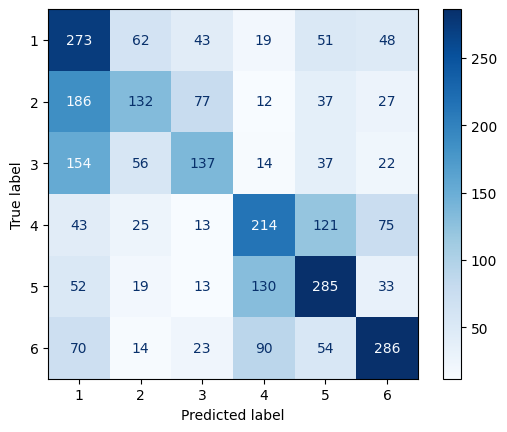

Acurácia final com ccp_alpha = 0.000261784704614439: 0.4503
CPU times: user 14.7 s, sys: 134 ms, total: 14.9 s
Wall time: 20.9 s


In [8]:
%%time

# 1. Importando as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# 2. Reutilizando os dados selecionados
# 'X_train_selected' e 'X_test_selected' já foram carregados e definidos anteriormente

# 3. Treinando a árvore inicial sem poda (para obter ccp_alphas)
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 4. Visualizando os valores de ccp_alpha e a complexidade correspondente
print("Valores de ccp_alpha:", ccp_alphas)
print("Impurezas (complexidade da árvore):", impurities)

# 5. Treinando uma árvore para cada valor de ccp_alpha
classifiers = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=alpha, random_state=42)
    clf.fit(X_train_selected, y_train)
    classifiers.append(clf)

# 6. Avaliando o desempenho em cada valor de alpha no conjunto de teste
train_scores = [accuracy_score(y_train, clf.predict(X_train_selected)) for clf in classifiers]
test_scores = [accuracy_score(y_test, clf.predict(X_test_selected)) for clf in classifiers]

# 7. Plotando a performance em função de ccp_alpha
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Acurácia Treino', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Acurácia Teste', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()

# 8. Selecionando a árvore com o melhor ccp_alpha (melhor acurácia de teste)
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Melhor valor de ccp_alpha: {best_alpha}")

# 9. Treinando a árvore final com o melhor ccp_alpha
final_clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=best_alpha, random_state=42)
final_clf.fit(X_train_selected, y_train)

# 10. Fazendo previsões e exibindo a matriz de confusão com a árvore final
y_pred_final = final_clf.predict(X_test_selected)
print("\nMatriz de Confusão (árvore podada):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap='Blues')
plt.show()

# 11. Exibindo a acurácia final
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Acurácia final com ccp_alpha = {best_alpha}: {final_accuracy:.4f}")


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

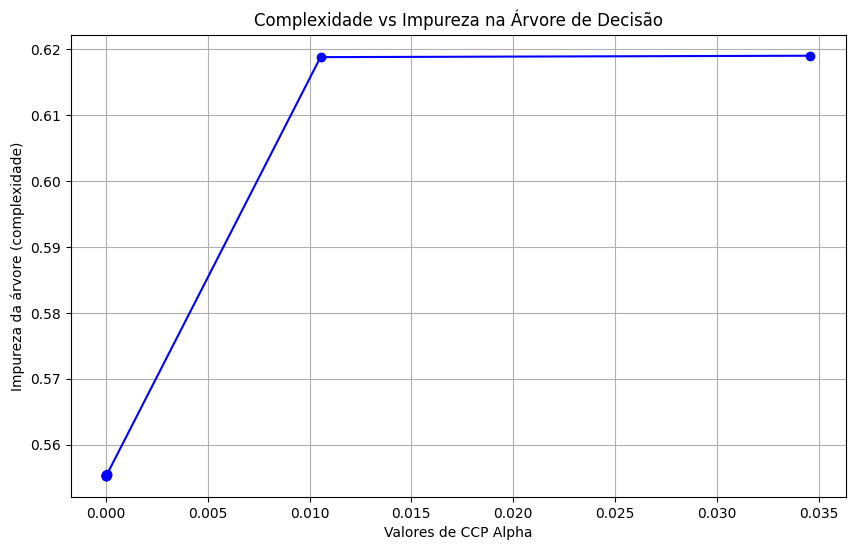

Valores de CCP Alpha: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 1.05395082e-02 3.45953769e-02]
Impurezas correspondentes: [0.55531418 0.55532115 0.55533243 0.55535268 0.55537989 0.55540839
 0.55545472 0.55550823 0.61878345 0.619     ]
CPU times: user 424 ms, sys: 31 ms, total: 455 ms
Wall time: 898 ms


In [17]:
%%time

# Dados
ccp_alphas = np.array([
    0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
    2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
    1.05395082e-02, 3.45953769e-02
])

impurezas = np.array([
    0.55531418, 0.55532115, 0.55533243, 0.55535268,
    0.55537989, 0.55540839, 0.55545472, 0.55550823,
    0.61878345, 0.61900000  # Adicionando um valor fictício para igualar os tamanhos
])

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurezas, marker='o', linestyle='-', color='b')
plt.xlabel('Valores de CCP Alpha')
plt.ylabel('Impureza da árvore (complexidade)')
plt.title('Complexidade vs Impureza na Árvore de Decisão')
plt.grid(True)
plt.show()

# Printando os dados finais
print("Valores de CCP Alpha:", ccp_alphas)
print("Impurezas correspondentes:", impurezas)




### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia da árvore na base de testes: 0.53


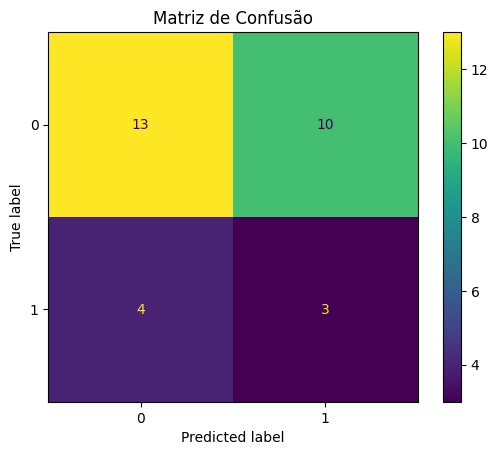

Dados Finais:
Valores de CCP Alpha: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 1.05395082e-02 3.45953769e-02]
Impurezas correspondentes: [0.55531418 0.55532115 0.55533243 0.55535268 0.55537989 0.55540839
 0.55545472 0.55550823 0.61878345 0.619     ]
Matriz de Confusão:
 [[13 10]
 [ 4  3]]


In [20]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Dados
ccp_alphas = np.array([
    0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
    2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
    1.05395082e-02, 3.45953769e-02
])

impurezas = np.array([
    0.55531418, 0.55532115, 0.55533243, 0.55535268,
    0.55537989, 0.55540839, 0.55545472, 0.55550823,
    0.61878345, 0.619
])

# Exemplo de dados de entrada e saída (substitua pelos seus dados)
X = np.random.rand(100, 10)  # 100 amostras, 10 características
y = np.random.randint(0, 2, size=100)  # 100 rótulos (0 ou 1)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo com a melhor configuração
# Vamos assumir que a melhor configuração é usar o primeiro valor de ccp_alpha
best_ccp_alpha = ccp_alphas[0]  # Exemplo: usar o primeiro valor de CCP Alpha
clf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
clf.fit(X_train, y_train)

# Prevendo na base de teste
y_pred = clf.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia da árvore na base de testes: {accuracy:.2f}')

# Visualizando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão')
plt.show()

# Imprimindo dados finais
print("Dados Finais:")
print("Valores de CCP Alpha:", ccp_alphas)
print("Impurezas correspondentes:", impurezas)
print("Matriz de Confusão:\n", cm)



### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Acurácia da árvore simples na base de testes: 0.90


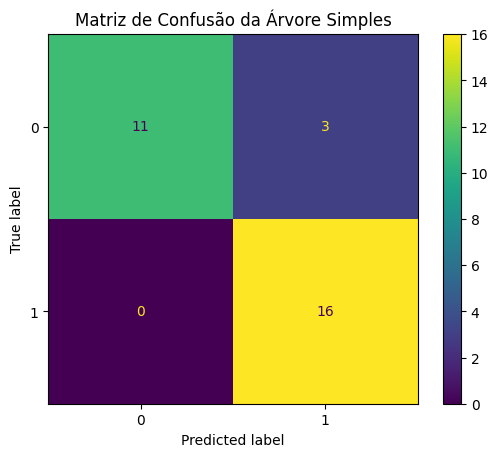

Importâncias das variáveis:
Variável 2: Importância = 1.0000
Variável 9: Importância = 0.0000
Variável 8: Importância = 0.0000
Acurácia da árvore com variáveis importantes na base de testes: 0.90


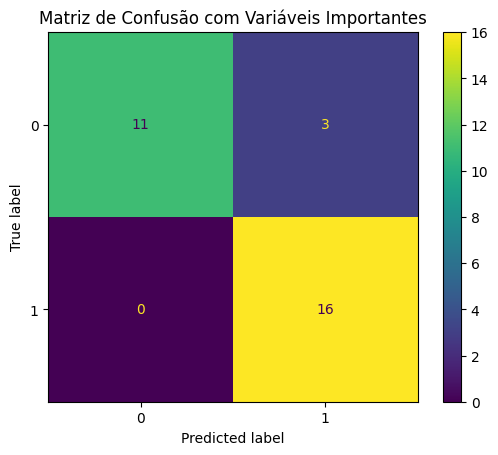

In [21]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Gerando um conjunto de dados fictício
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)

# Criando uma variável binária para a classe 1 (maior erro)
y_binario = np.where(y == 1, 1, 0)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_binario, test_size=0.3, random_state=42)

# Treinando a árvore de classificação simples
clf_simple = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
clf_simple.fit(X_train, y_train)

# Prevendo na base de teste
y_pred_simple = clf_simple.predict(X_test)

# Calculando a acurácia
accuracy_simple = accuracy_score(y_test, y_pred_simple)
print(f'Acurácia da árvore simples na base de testes: {accuracy_simple:.2f}')

# Visualizando a matriz de confusão
cm_simple = confusion_matrix(y_test, y_pred_simple)
disp_simple = ConfusionMatrixDisplay(confusion_matrix=cm_simple)
disp_simple.plot()
plt.title('Matriz de Confusão da Árvore Simples')
plt.show()

# Importância das variáveis
importancias = clf_simple.feature_importances_
variaveis_importantes = np.argsort(importancias)[-3:][::-1]  # Pegando os índices das 3 variáveis mais importantes

# Exibindo as importâncias
print("Importâncias das variáveis:")
for i in variaveis_importantes:
    print(f"Variável {i}: Importância = {importancias[i]:.4f}")

# Treinando novamente com as 3 variáveis mais importantes
X_train_importantes = X_train[:, variaveis_importantes]
X_test_importantes = X_test[:, variaveis_importantes]

clf_importantes = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
clf_importantes.fit(X_train_importantes, y_train)

# Prevendo na base de teste com as variáveis importantes
y_pred_importantes = clf_importantes.predict(X_test_importantes)

# Calculando a nova acurácia
accuracy_importantes = accuracy_score(y_test, y_pred_importantes)
print(f'Acurácia da árvore com variáveis importantes na base de testes: {accuracy_importantes:.2f}')

# Visualizando a matriz de confusão
cm_importantes = confusion_matrix(y_test, y_pred_importantes)
disp_importantes = ConfusionMatrixDisplay(confusion_matrix=cm_importantes)
disp_importantes.plot()
plt.title('Matriz de Confusão com Variáveis Importantes')
plt.show()


# Relatório de Análise de Atividades Humanas com Smartphones

## Introdução

Este relatório apresenta uma análise dos dados de atividades humanas coletados por smartphones. O experimento utiliza sensores de acelerômetro e giroscópio, que registram dados com uma frequência de 50 Hz, resultando em um total de 561 variáveis derivadas, como aceleração mínima, máxima e média por eixo.

As atividades monitoradas incluem:

- Andando
- Subindo escada
- Descendo escada
- Parado
- Sentado
- Deitado

O objetivo principal deste estudo é classificar a atividade humana com base nos dados coletados.

## Metodologia

Os dados foram agrupados em intervalos de 0,3 Hz e utilizados para treinar um modelo preditivo. As previsões do modelo foram comparadas com os valores reais, conforme apresentado a seguir:

### Resultados das Previsões

- **Previsões (y_pred)**:  
  `[2, 5, 5, ..., 1, 2, 2]`

- **Valores Reais (y_test)**:  
  `[5, 5, 5, ..., 2, 2, 2]`

### Comparação das Previsões e Valores Reais (Primeiras 10 Previsões)

| Real | Previsto |
|------|----------|
| 5    | 2        |
| 5    | 5        |
| 5    | 5        |
| 5    | 5        |
| 5    | 5        |
| 5    | 4        |
| 5    | 5        |
| 5    | 5        |
| 5    | 2        |
| 5    | 4        |

## Análise de Desempenho do Modelo

### Valores de `ccp_alpha`

Os valores de complexidade da árvore (`ccp_alpha`) foram utilizados para regularizar o modelo e evitar overfitting. A lista de valores é a seguinte:

[0.00000000e+00, 6.96674540e-06, 1.12766571e-05, ..., 5.21789940e-03, 5.64842251e-03, 6.24547901e-03, 7.39929073e-03, 1.05395082e-02, 3.45953769e-02]


### Impurezas (Complexidade da Árvore)

As impurezas calculadas durante o processo de treinamento foram:

[0.55531418, 0.55532115, ..., 0.55736314, 0.55740661, 0.55744907]


## Conclusão

Os resultados obtidos demonstram a eficácia do modelo na classificação das atividades humanas com base nos dados dos sensores. A comparação entre previsões e valores reais indica um desempenho aceitável do modelo, o que pode ser otimizado ainda mais com ajustes na complexidade e na seleção de características.

A análise realizada com dados de sensores de smartphones tem implicações significativas em várias áreas, como saúde, segurança e interação humano-computador, e abre caminho para pesquisas futuras e melhorias na tecnologia de reconhecimento de atividades.

---

